In [25]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
import statsmodels.api as sm

In [26]:
# Import data
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Data Analysis

In [27]:
# Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [28]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [29]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [30]:
df.duplicated().sum()

127

In [31]:
df.drop_duplicates(inplace=True, ignore_index=False)

In [32]:
df.duplicated().sum()

0

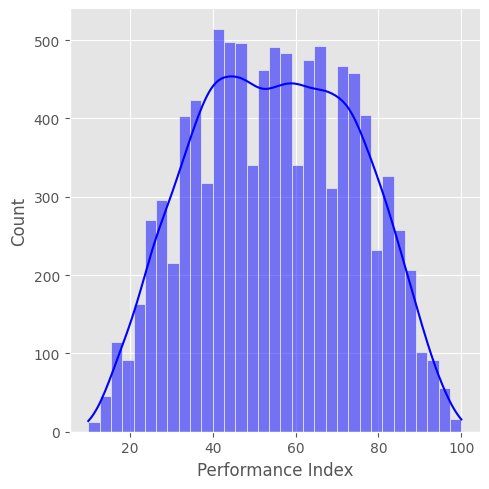

In [33]:
# Visualize the distribution of the 'Performance Index' variable
plt.style.use('ggplot')
sns.displot(x='Performance Index', data=df, kde=True, color='blue');

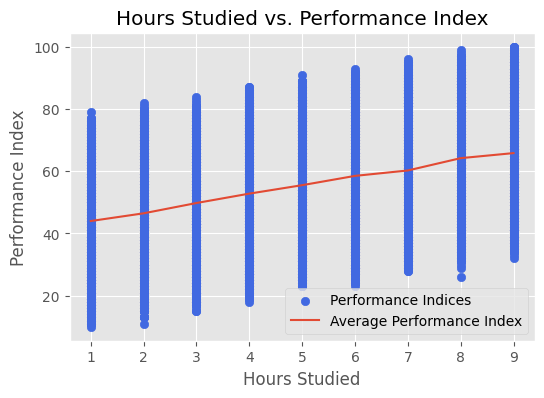

In [34]:
# Scatter Plot of the 'Hours Studied' variable vs. the 'Performance Index' variable
plt.figure(figsize=(6,4))
plt.scatter(df['Hours Studied'], df['Performance Index'], color='royalblue')
avg_performance_by_hours = df.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs. Performance Index')
plt.legend(['Performance Indices', 'Average Performance Index'])
plt.show();

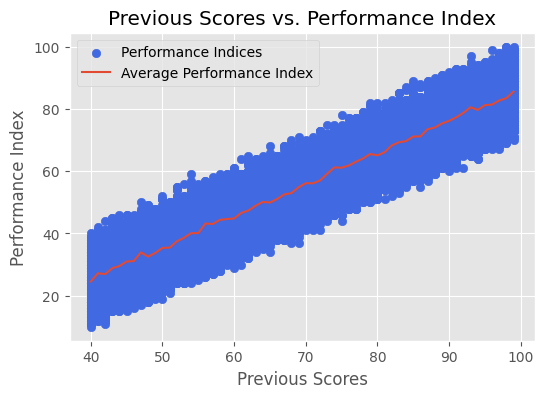

In [35]:
# Scatter Plot of the 'Previous Scores' variable vs. the 'Performance Index' variable
plt.figure(figsize=(6,4))
plt.scatter(df['Previous Scores'], df['Performance Index'], color='royalblue')
avg_performance_by_hours = df.groupby('Previous Scores')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Previous Scores vs. Performance Index')
plt.legend(['Performance Indices', 'Average Performance Index'])
plt.show();

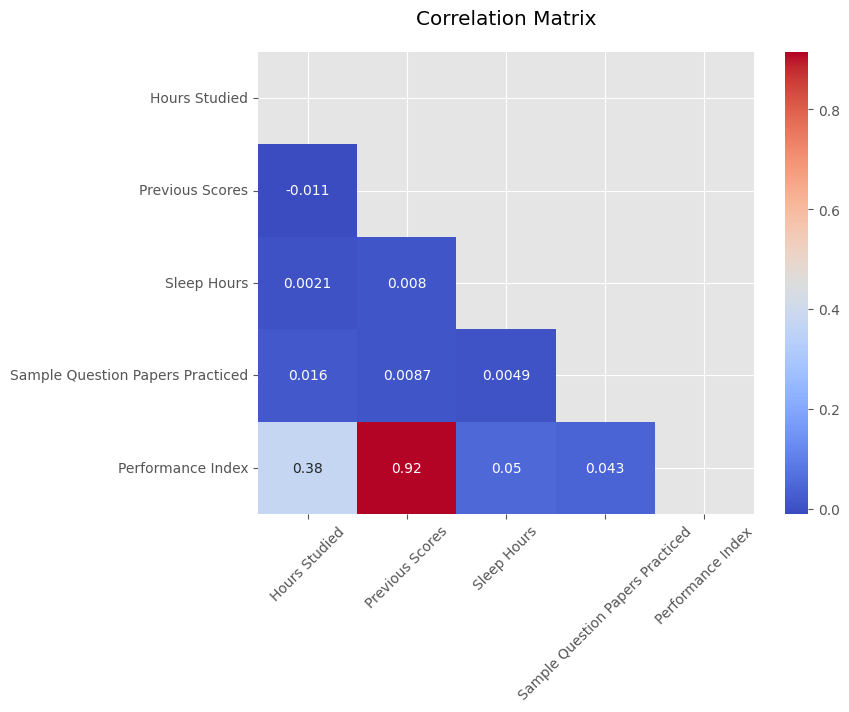

In [36]:
# Compute the correlation matrix 
corr = df.select_dtypes(exclude = object).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(8,6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', pad=20)
plt.xticks(rotation=45)
plt.show()

## Model Building

In [37]:
# Separate the response variable from the predictors
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [38]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=6, train_size=0.8)

In [39]:
# Label encode the categorical column
encoder = LabelEncoder()
X_train["Extracurricular Activities"] = encoder.fit_transform(X_train["Extracurricular Activities"])
X_test["Extracurricular Activities"] = encoder.transform(X_test["Extracurricular Activities"])

In [40]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predict data based on the test set
y_pred = model.predict(X_test)

## Model's Performance Assession

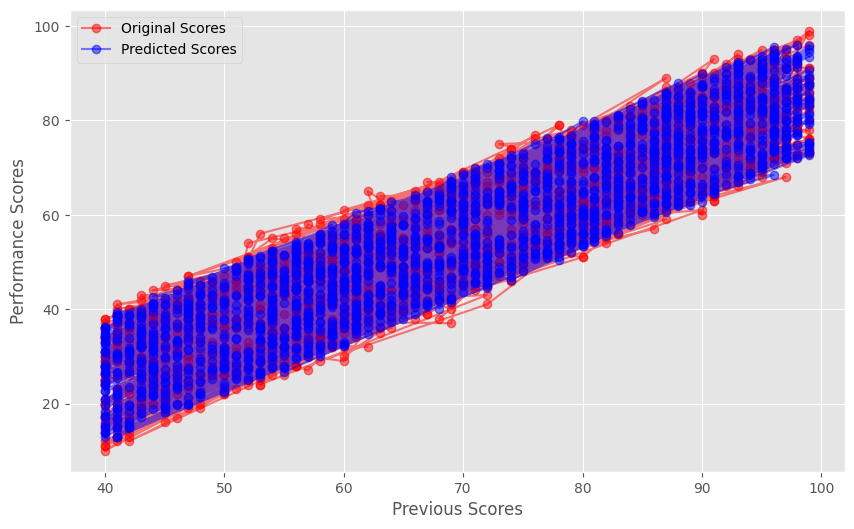

In [42]:
# Visualize our predictions vs. the original values
plt.figure(figsize=(10,6))
plt.plot(X_test['Previous Scores'], y_test, marker='o', color='r', alpha=0.5)
plt.plot(X_test['Previous Scores'], y_pred, marker='o', color='b', alpha=0.5)
plt.xlabel('Previous Scores')
plt.ylabel('Performance Scores')
plt.legend(['Original Scores', 'Predicted Scores'])
plt.show();

In [43]:
# Get coefficient estimates
coefs = [model.intercept_]
coefs += list(model.coef_)

table_index = ['Intercept']
table_index += list(df.drop('Performance Index', axis=1).columns)

table_coefs = pd.DataFrame(coefs, index=table_index, columns=['Coefficient Estimates'])
table_coefs

,Coefficient Estimates
Intercept,-34.123969
Hours Studied,2.854264
Previous Scores,1.017448
Extracurricular Activities,0.620592
Sleep Hours,0.495419
Sample Question Papers Practiced,0.194411


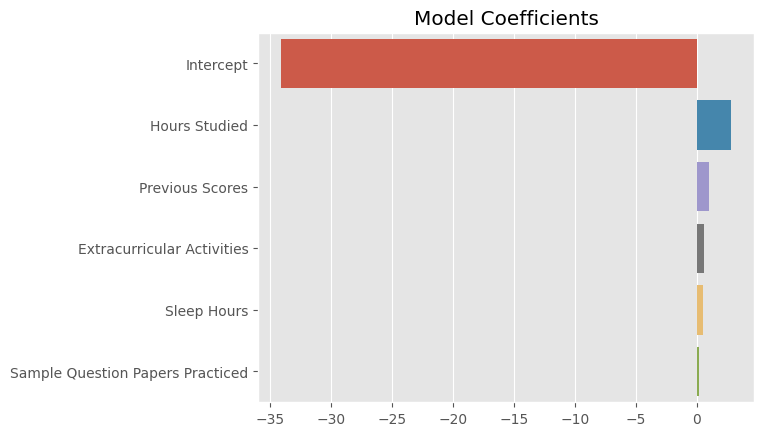

In [44]:
# Visualize crude measure of feature importance.
sns.barplot(data=table_coefs.T, orient='h').set(title='Model Coefficients');

In [45]:
# Add a constant
X_train = sm.add_constant(X_train)

# Train a new model
model_OLS = sm.OLS(y_train, X_train).fit()

In [46]:
# Check the values of the coefficient estimates
model_OLS.params

const                              -34.123969
Hours Studied                        2.854264
Previous Scores                      1.017448
Extracurricular Activities           0.620592
Sleep Hours                          0.495419
Sample Question Papers Practiced     0.194411
dtype: float64

In [47]:
# Print a summary of the linear regression model obtained
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.360e+05
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        22:29:16   Log-Likelihood:                -16910.
No. Observations:                7898   AIC:                         3.383e+04
Df Residuals:                    7892   BIC:                         3.387e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [48]:
# Compute the model's standard error
np.sqrt(model_OLS.mse_resid)

2.0595058040194245